<a href="https://colab.research.google.com/github/Saivenkatbattula/Project-2/blob/main/Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.data collection 

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle

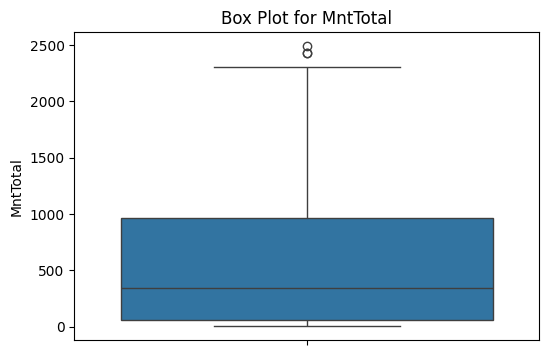

outliers
       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1159  90638.0        0         0       29      1156        120   
1467  87679.0        0         0       62      1259        172   
1547  90638.0        0         0       29      1156        120   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1159              915               94               144            96  ...   
1467              815               97               148            33  ...   
1547              915               94               144            96  ...   

      marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
1159                 0              0                   0                0   
1467                 1              0                   0                0   
1547                 0              0                   0                0   

      education_Graduation  education_Master  education_PhD  MntTotal  \
1159                   

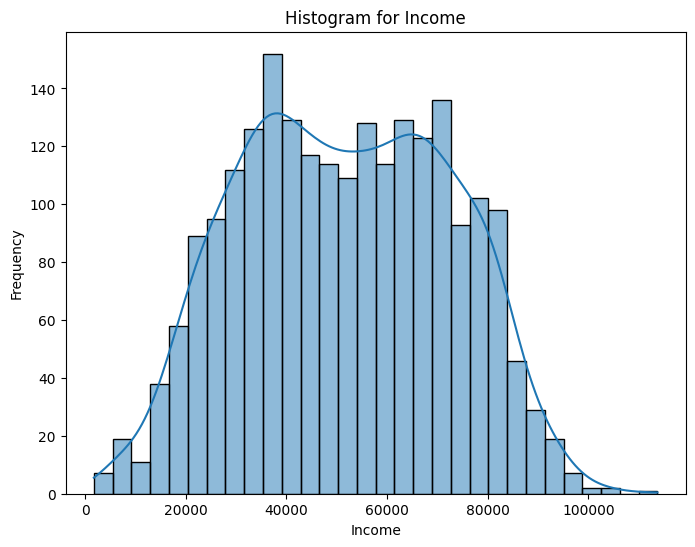

histogram for age


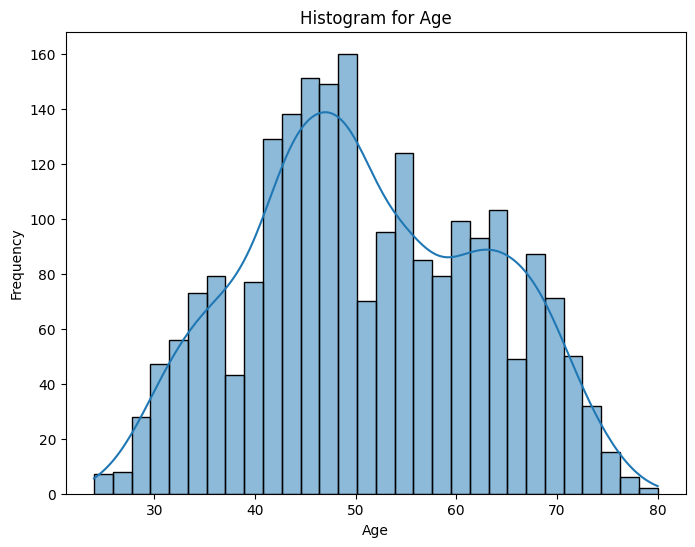

5.k-means clustering
             Income      MntTotal
count  2.205000e+03  2.205000e+03
mean   2.255691e-17 -3.705778e-17
std    1.000227e+00  1.000227e+00
min   -2.409272e+00 -9.704038e-01
25%   -7.932106e-01 -8.800957e-01
50%   -1.618161e-02 -3.816642e-01
75%    8.044529e-01  6.968235e-01
max    2.999363e+00  3.348757e+00
6.insights and recommendations
1.We can Calculate the average purchase value by summing up all purchase amounts and dividing by the total number of transactions
2.We can Visualize the distribution using histograms or box plots to identify any patterns or anomalies


In [3]:
#level 1 project 2
#customer segmentation analysis
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("1.data collection \n")
# 1.data loading & cleaning
file_path ='/content/ifood_df.csv'
df = pd.read_csv(file_path)
print(df.head())

#printing all data columns
print("checking all columns in our dataframe \n")
print(df.columns )
print("2.data exploration and cleaning \n ")
#2.data exploration and cleaning

#looking for missing value
print("looking for missing value \n")
print(df.isna().sum())

#uniqueness
print("uniqueness \n")
print(df.nunique())

#Data Exploration

print("data exploration")
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()
#Outliers

print("outliers")
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
print(outliers.head())




# 3.Calculate Average Purchase Value
print("3.Descriptive Statistics")
transactions = pd.DataFrame(df)
total_amount_spent = transactions['Income'].sum()
total_transactions = transactions.shape[0]
average_purchase_value = total_amount_spent / total_transactions

print("Average Purchase Value:", average_purchase_value)
#4.visualization
print("4.visualization")
#histogram for income
print("Hiotogram for income")
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

#histogram for age
print("histogram for age")
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#K-Means Clustering
print("5.k-means clustering")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal']
data_scaled = df.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
print(data_scaled[cols_for_clustering].describe())

print("6.insights and recommendations")

print("1.We can Calculate the average purchase value by summing up all purchase amounts and dividing by the total number of transactions")
print("2.We can Visualize the distribution using histograms or box plots to identify any patterns or anomalies")